# Analyse the Results of Running Moran Process Experiment on Different Graphs
This is the newest version of this analysis file, where I can merge the csv of different jobs. 

imports

In [ ]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from analysis_utils import setup_analysis_environment, load_all_data, load_experiment_data, aggregate_results, plot_property_effect
# change this if on a different computer!
%cd /home/labs/pilpel/matanyaw/moran-process 
from population_graph import GRAPH_PROPS
# Set aesthetic parameters for "publication-quality" plots
sns.set_theme(style="whitegrid", context="notebook", font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['lines.linewidth'] = 2.5

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/labs/pilpel/matanyaw/moran-process


In [22]:
from pathlib import Path

batch_name = 'batch_first_big_batch'

ROOT = Path(os.getcwd()) 

# Now define your paths relative to ROOT
batch_dir = ROOT / "simulation_data" / "tmp" /  batch_name
data_dir = ROOT / "simulation_data"




In [23]:
results_df = aggregate_results(batch_dir=batch_dir, save_to_dir=data_dir, delete_temp=False)
print("Results Dataframe Shape : ", results_df.shape)



File /home/labs/pilpel/matanyaw/moran-process/simulation_data/first_big_batch_results.csv already exitst! Not aggregating...
✓ Loaded /home/labs/pilpel/matanyaw/moran-process/simulation_data/first_big_batch_results.csv: (4600, 9)
Results Dataframe Shape :  (4600, 9)


In [24]:

# Extract data for use in notebook
df_graphs = load_experiment_data('graph_database.csv')       # Graph database


print("Shape before merging: ", results_df.shape)
results_df = pd.merge(
    results_df, 
    df_graphs, 
    on='wl_hash', 
    how='left', 
    suffixes=('', '_db')
)
print("Shape after merging: ", results_df.shape)


✓ Loaded graph_database.csv: (53, 32)
Shape before merging:  (4600, 9)
Shape after merging:  (4600, 40)


In [25]:
# Filter for successful fixations for time analysis
success_df = results_df[results_df['fixation'] == True]

# 1. Calculate P(fix) for every unique graph and r value
# Group by category, name, hash, and r
stats_prob = results_df.groupby(['wl_hash', 'r', 'graph_name',])['fixation'].mean().reset_index(name='prob_fixation')

# 2. Calculate Median Steps (Conditional on Fixation)
stats_time = success_df.groupby(['wl_hash', 'r', 'graph_name',])['steps'].median().reset_index(name='median_steps')

# 3. Merge metrics into a single analysis dataframe
analysis_df = pd.merge(stats_prob, stats_time, on=['wl_hash', 'r', 'graph_name',], how='outer')
analysis_df = pd.merge(
    analysis_df, 
    df_graphs, 
    on='wl_hash', 
    how='left', 
    suffixes=('', '_db')
)
analysis_df['z_order'] = np.where(analysis_df['category'] == 'Random', 0, 1)
analysis_df = analysis_df.sort_values('z_order')

analysis_df = analysis_df[analysis_df['category'] != 'Complete']

# Display sample
analysis_df.tail(20)

,wl_hash,r,graph_name,prob_fixation,median_steps,graph_name_db,graph_type,n_nodes,n_edges,is_directed,...,avg_closeness_centrality,max_closeness_centrality,category,branching,depth,n_rods,rods_length,rod_length,seed,z_order
29,79e2e1631e630083a3cc8727bb210b27,1.1,random_n31_e30,0.10,7523.5,random_n31_e30,NaN,31,30,False,...,0.168388,0.240000,Random,NaN,NaN,NaN,NaN,NaN,NaN,0
28,79e2e1631e630083a3cc8727bb210b27,1.0,random_n31_e30,0.06,9583.0,random_n31_e30,NaN,31,30,False,...,0.168388,0.240000,Random,NaN,NaN,NaN,NaN,NaN,NaN,0
36,bc3774f51809c78e0f14ddaf1cb6b299,1.0,random_n31_e31,0.07,5437.0,random_n31_e31,NaN,31,31,False,...,0.182834,0.267857,Random,NaN,NaN,NaN,NaN,NaN,NaN,0
37,bc3774f51809c78e0f14ddaf1cb6b299,1.1,random_n31_e31,0.11,7140.0,random_n31_e31,NaN,31,31,False,...,0.182834,0.267857,Random,NaN,NaN,NaN,NaN,NaN,NaN,0
34,af714a4701eb88e7aeef5ef7b509dbbc,1.0,random_n31_e31,0.05,10354.0,random_n31_e31,NaN,31,31,False,...,0.190666,0.283019,Random,NaN,NaN,NaN,NaN,NaN,NaN,0
35,af714a4701eb88e7aeef5ef7b509dbbc,1.1,random_n31_e31,0.13,7937.0,random_n31_e31,NaN,31,31,False,...,0.190666,0.283019,Random,NaN,NaN,NaN,NaN,NaN,NaN,0
44,e61e6d16bd2d5052dac7ab10b7975bb9,1.0,random_n31_e30,0.06,11442.5,random_n31_e30,NaN,31,30,False,...,0.171829,0.256410,Random,NaN,NaN,NaN,NaN,NaN,NaN,0
45,e61e6d16bd2d5052dac7ab10b7975bb9,1.1,random_n31_e30,0.12,5509.0,random_n31_e30,NaN,31,30,False,...,0.171829,0.256410,Random,NaN,NaN,NaN,NaN,NaN,NaN,0
42,d1a6055ef06272ded223c237dc8f2a86,1.0,random_n31_e31,0.02,8388.5,random_n31_e31,NaN,31,31,False,...,0.207087,0.303030,Random,NaN,NaN,NaN,NaN,NaN,NaN,0
43,d1a6055ef06272ded223c237dc8f2a86,1.1,random_n31_e31,0.07,4751.0,random_n31_e31,NaN,31,31,False,...,0.207087,0.303030,Random,NaN,NaN,NaN,NaN,NaN,NaN,0


19


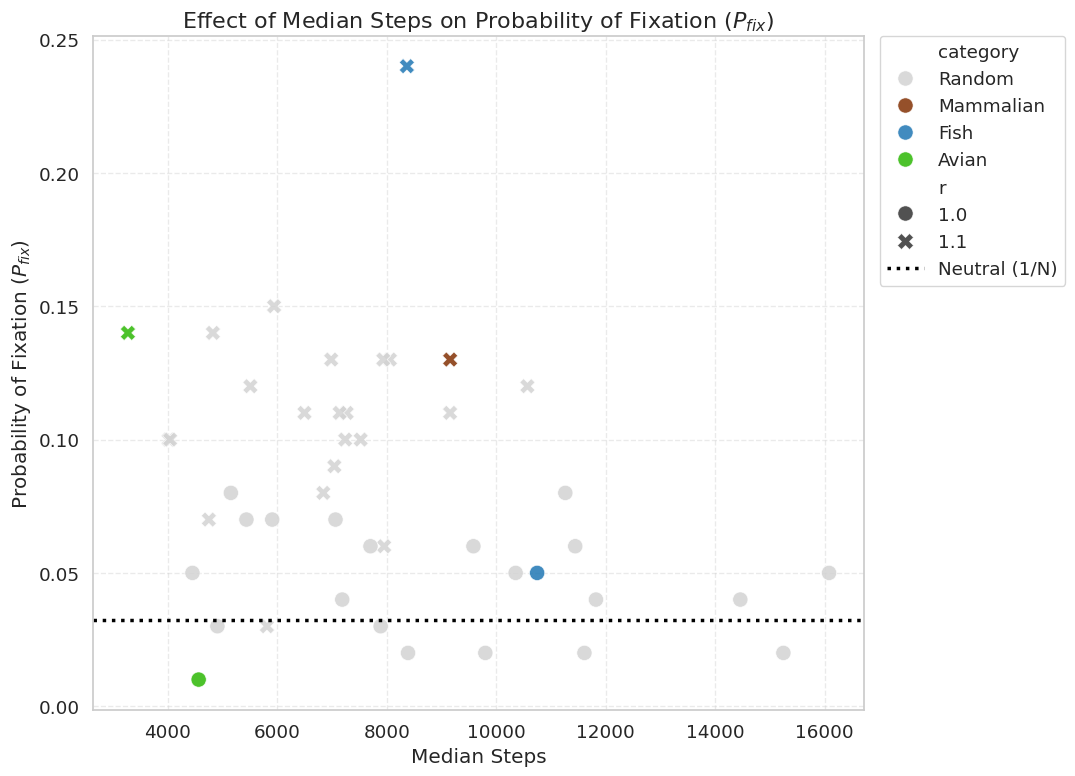

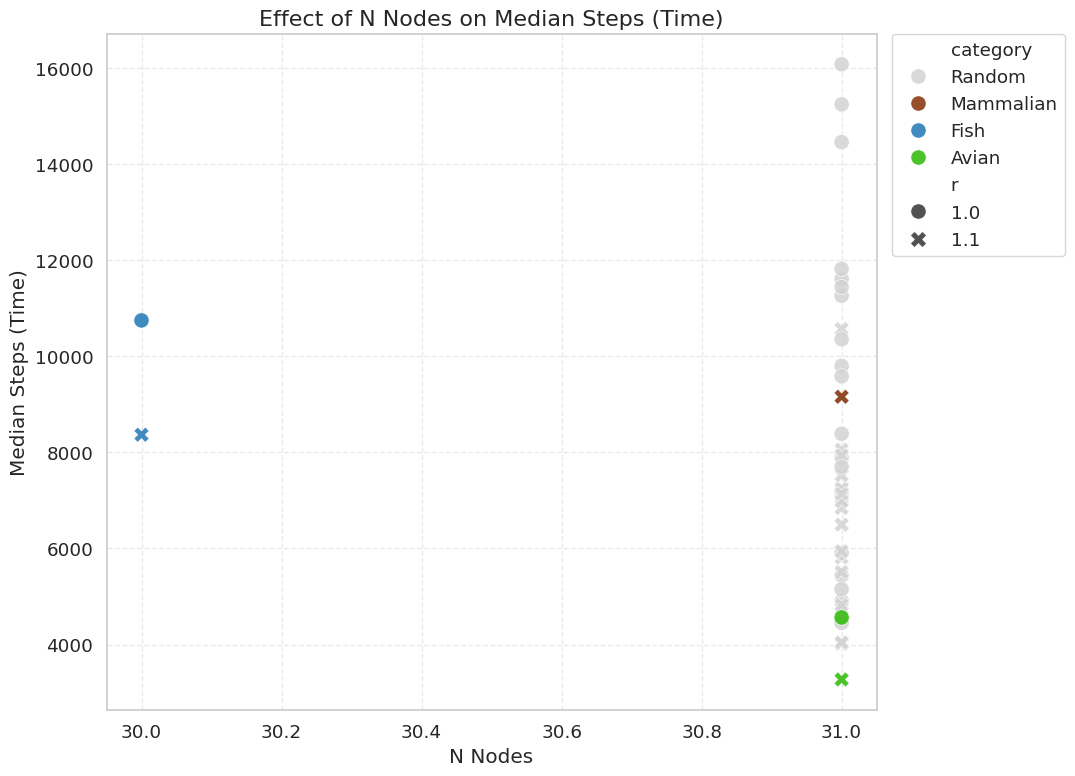

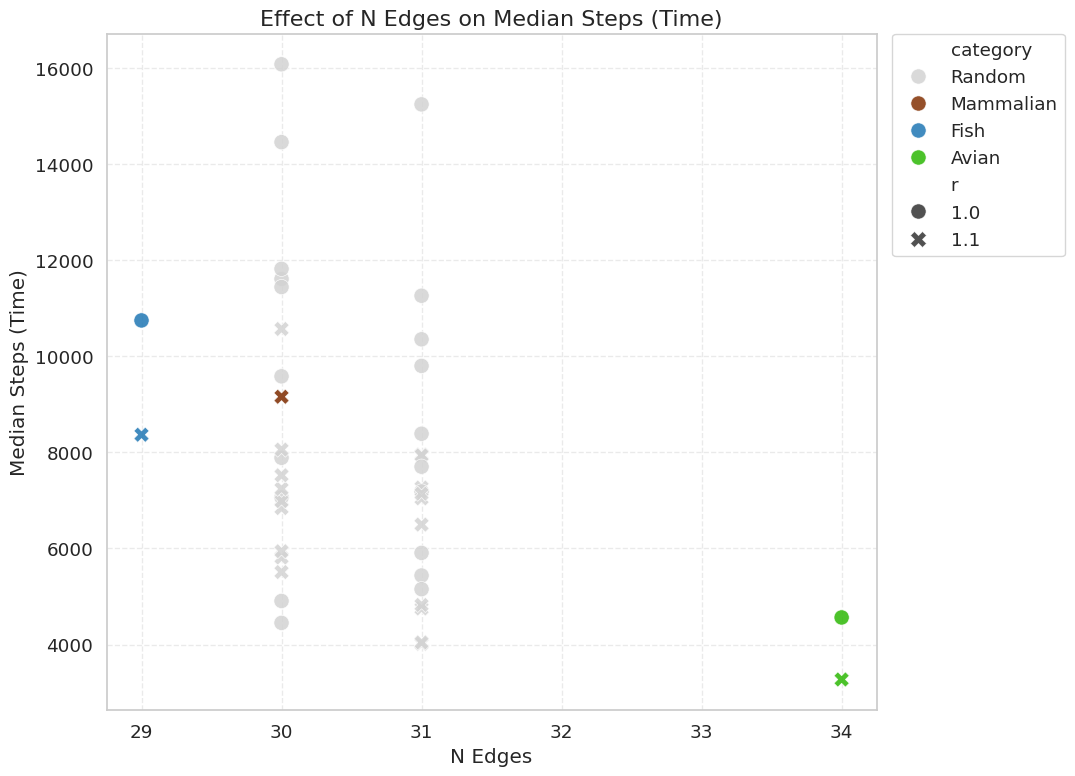

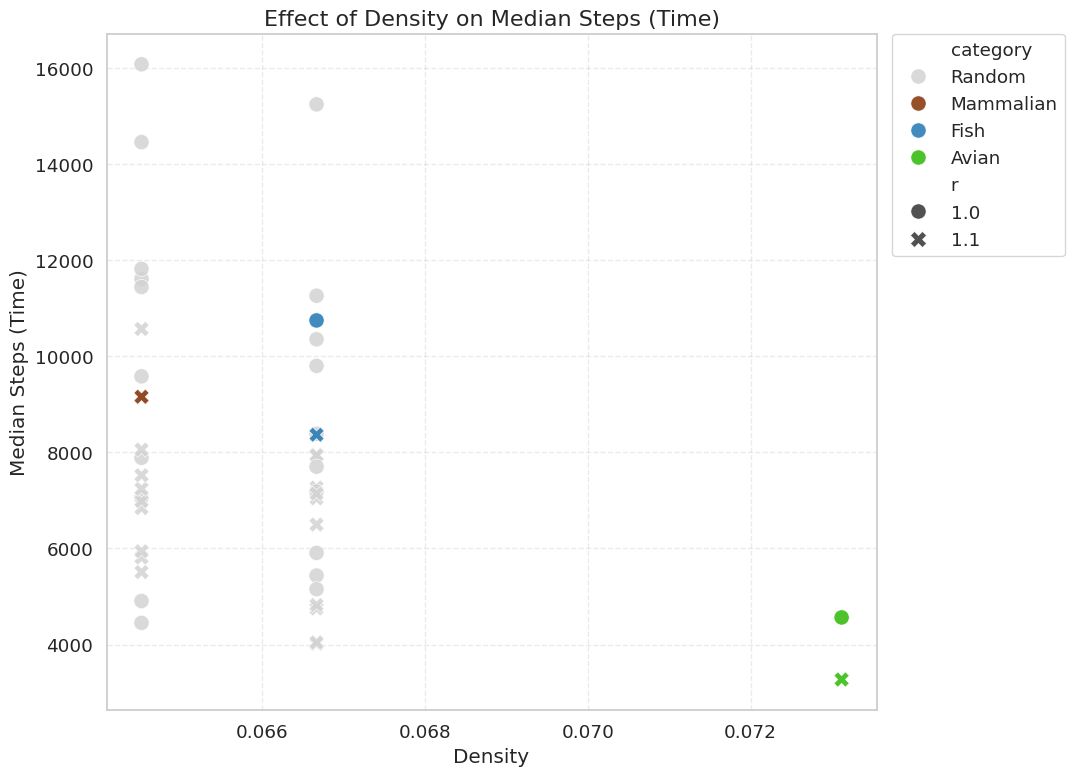

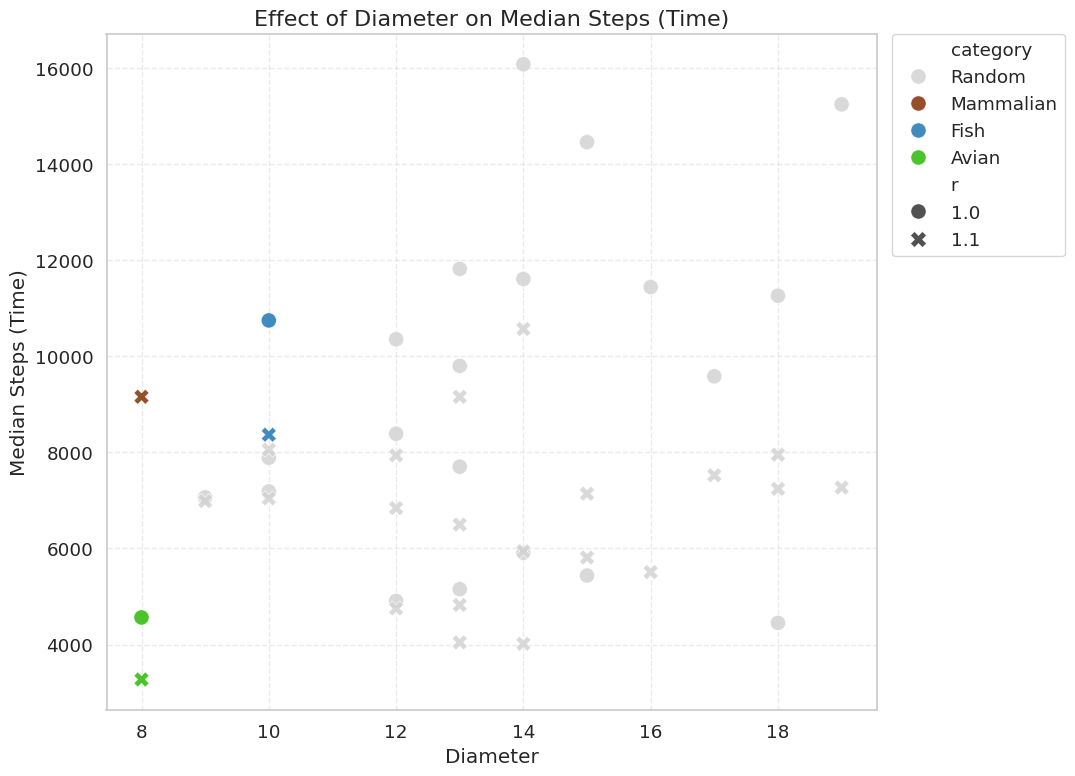

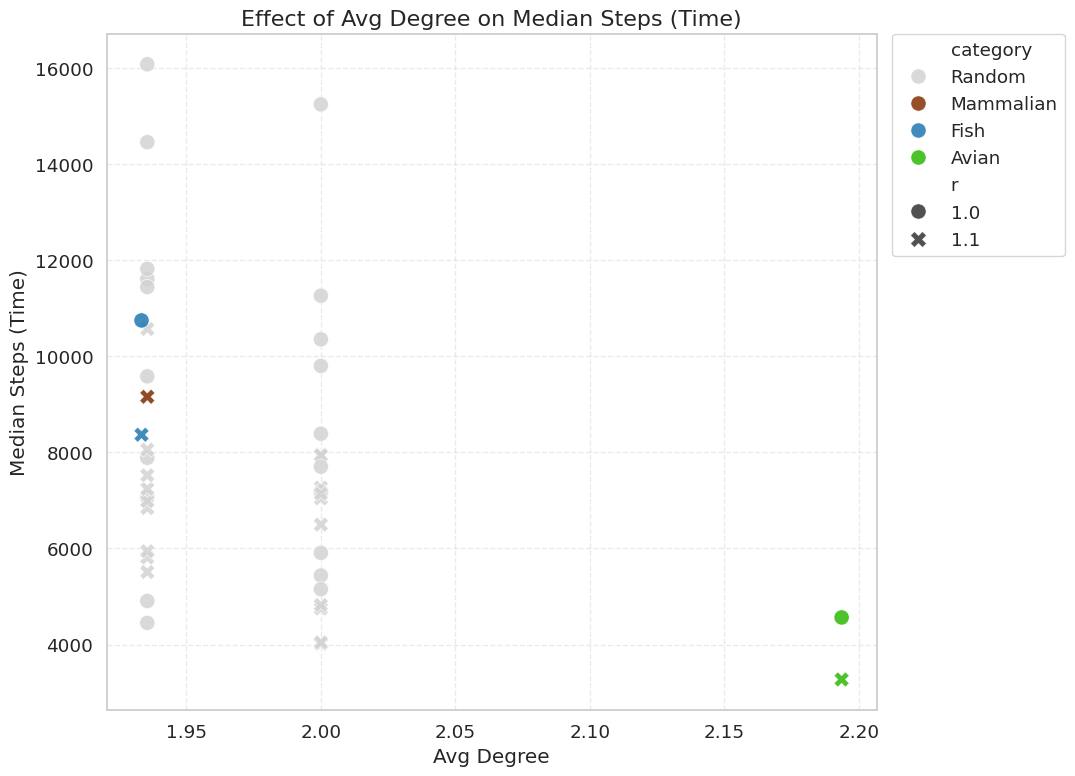

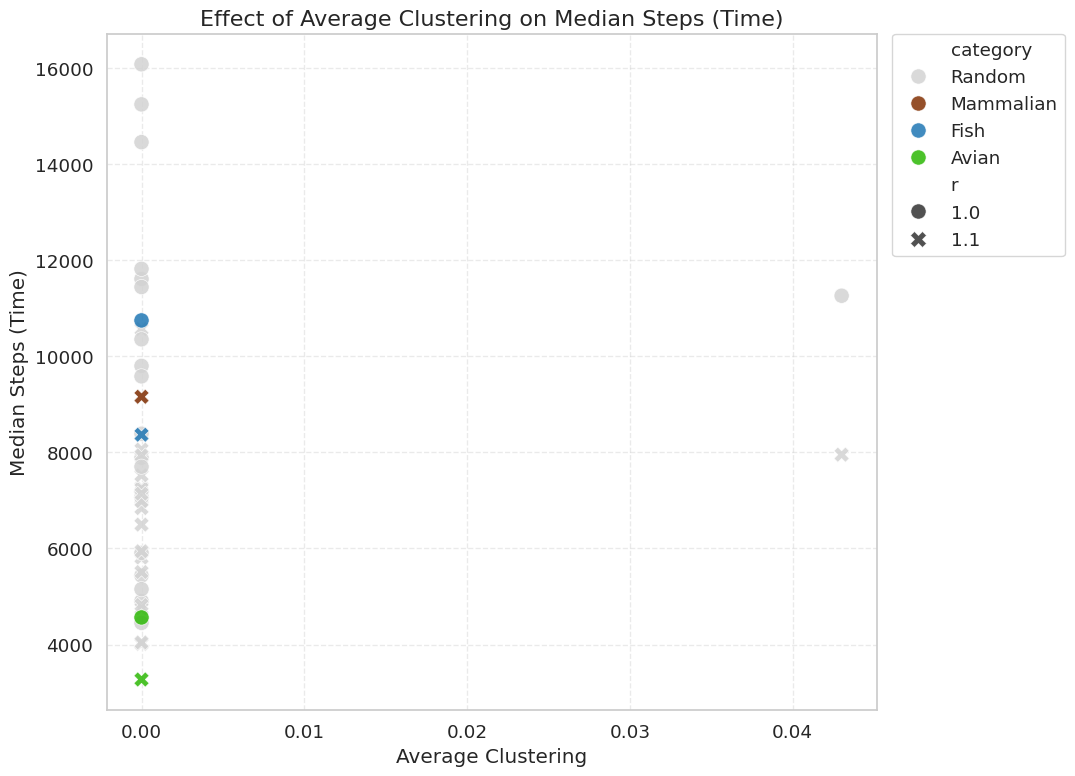

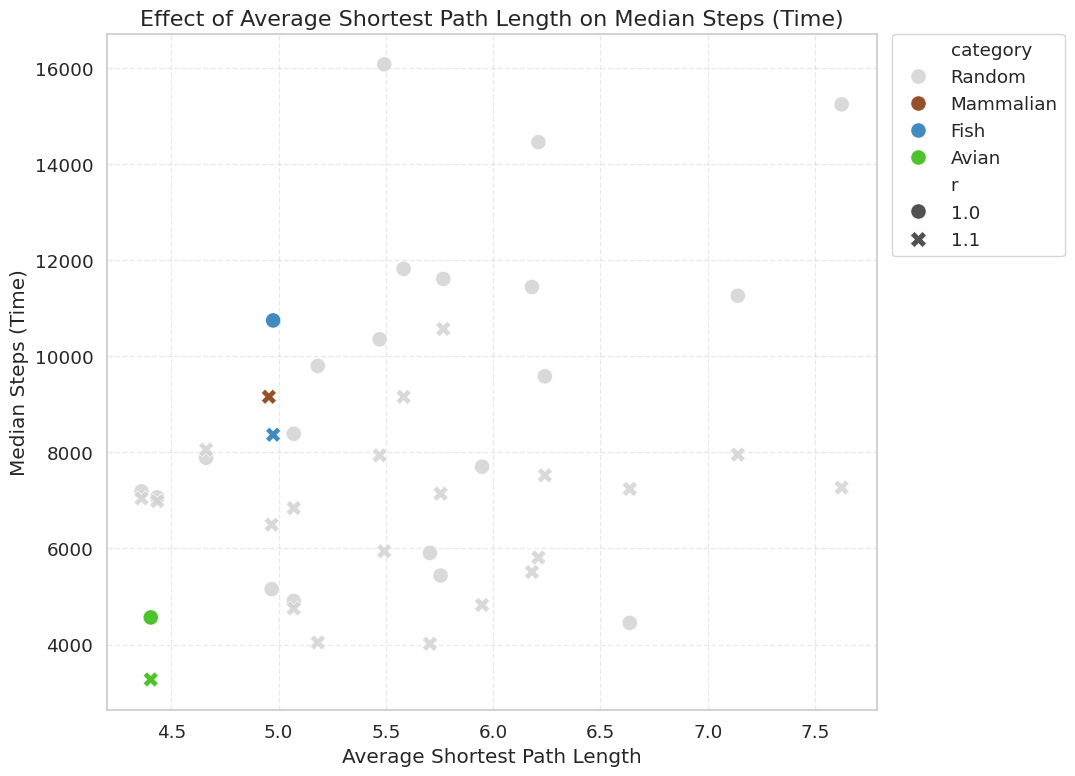

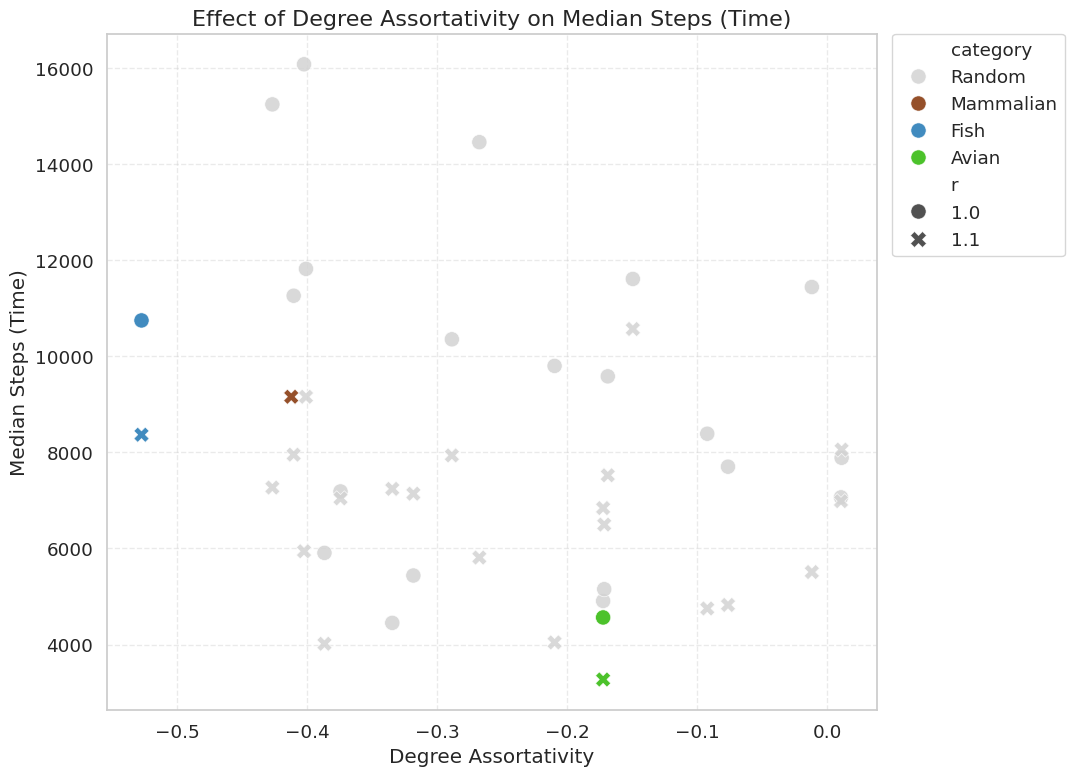

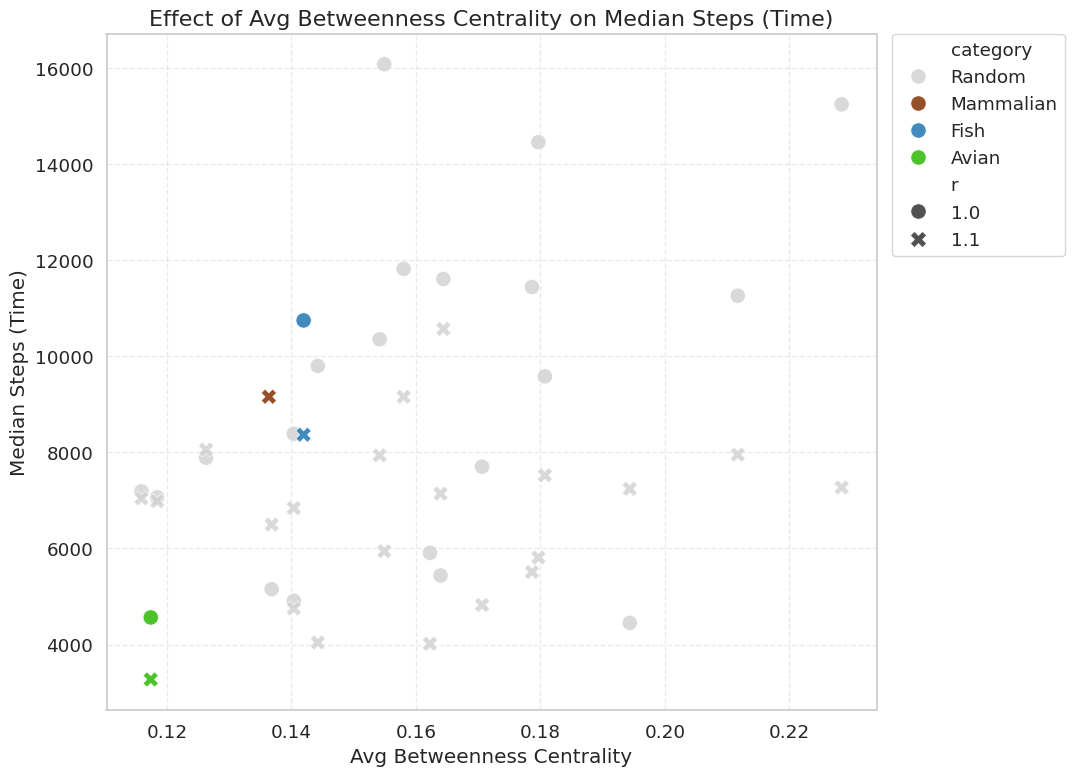

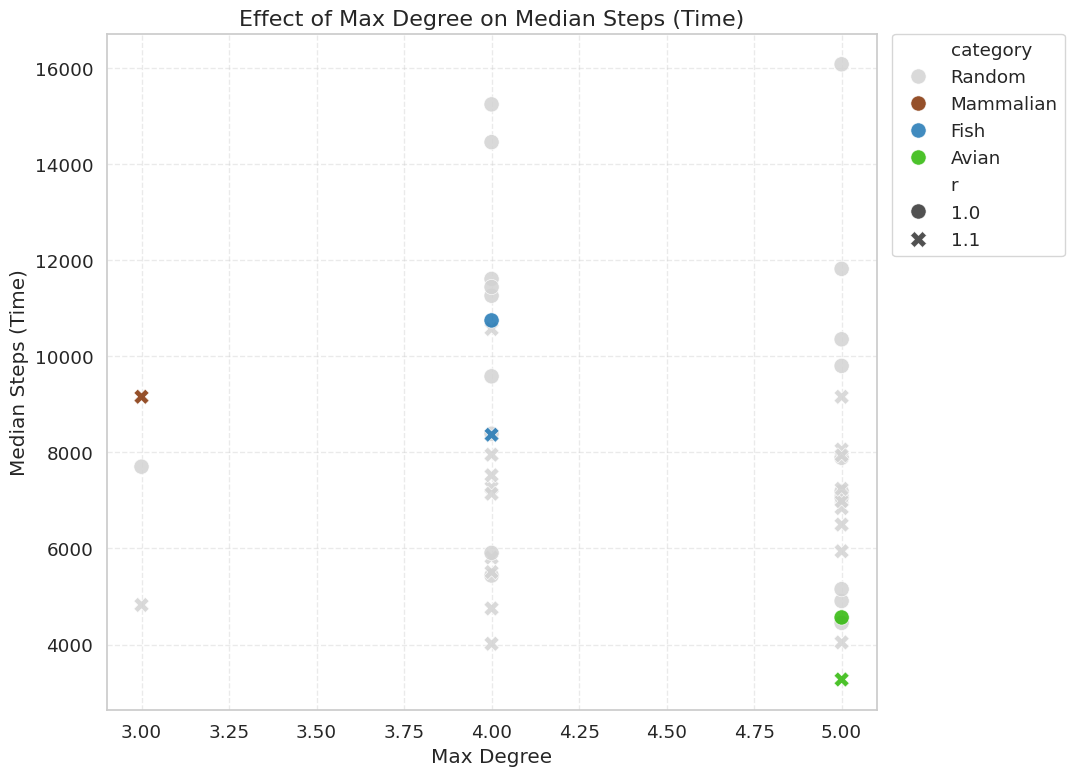

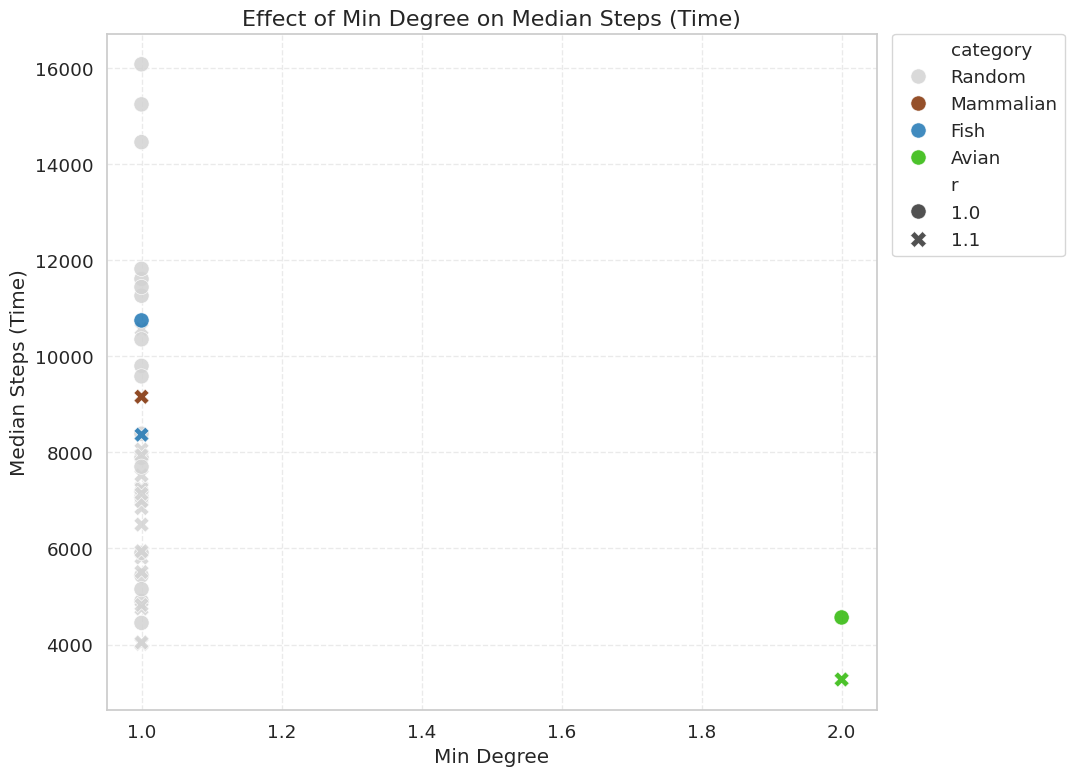

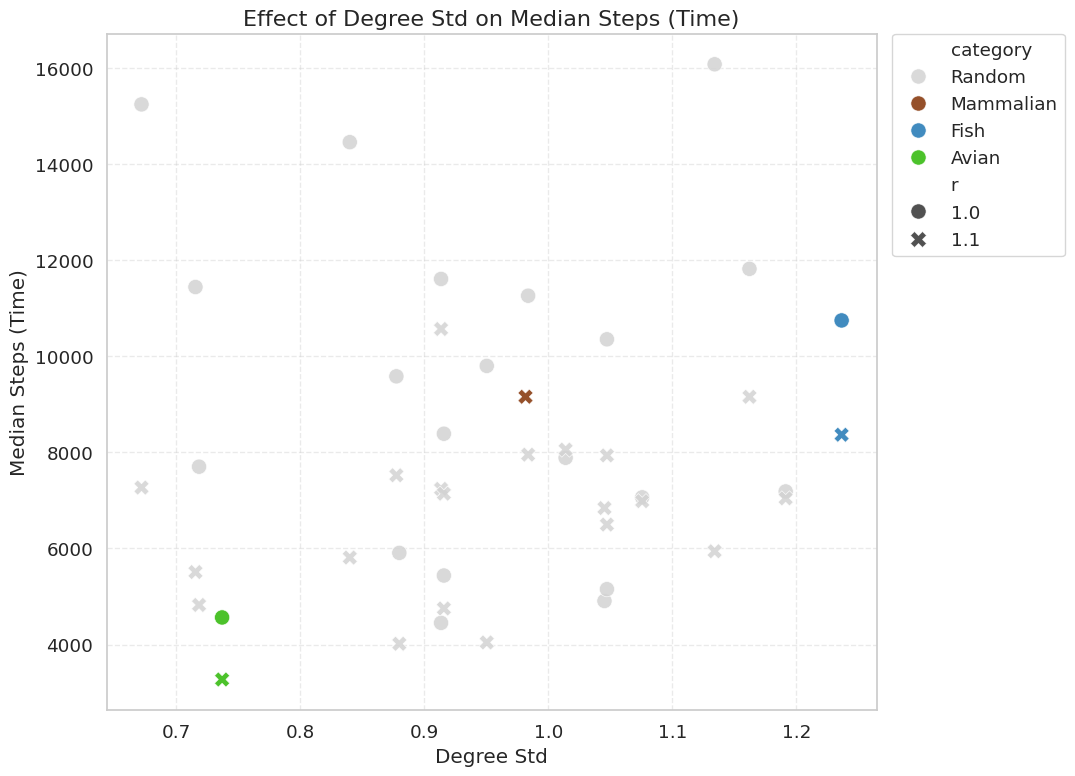

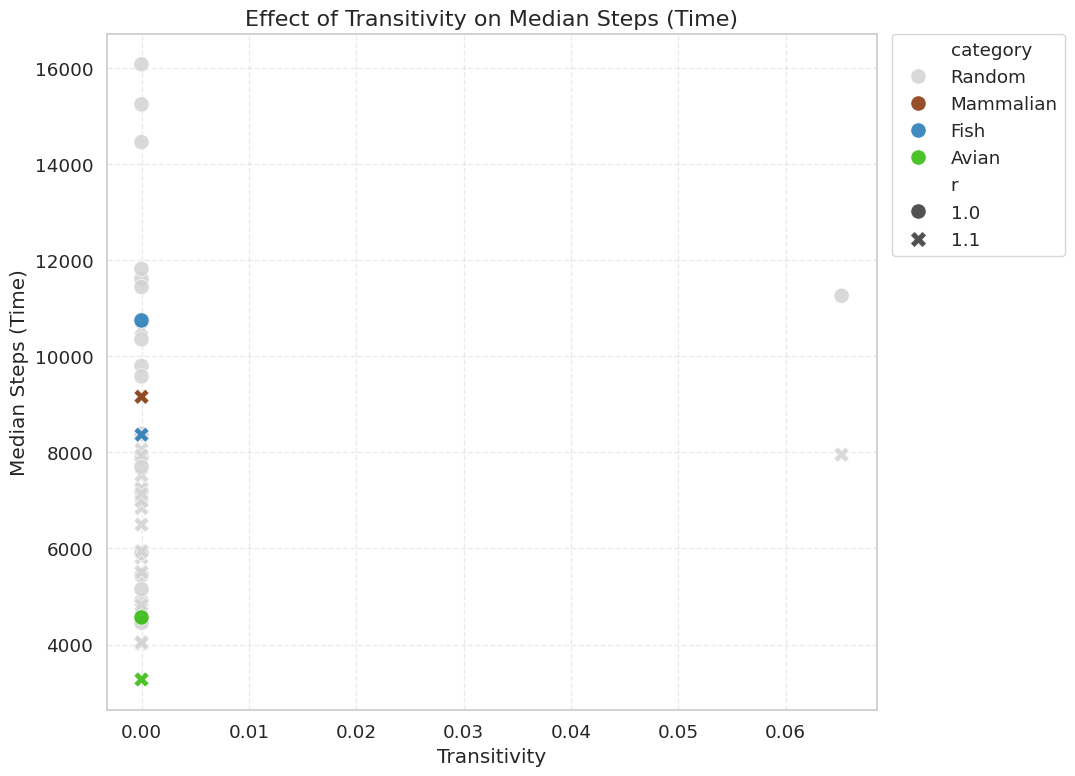

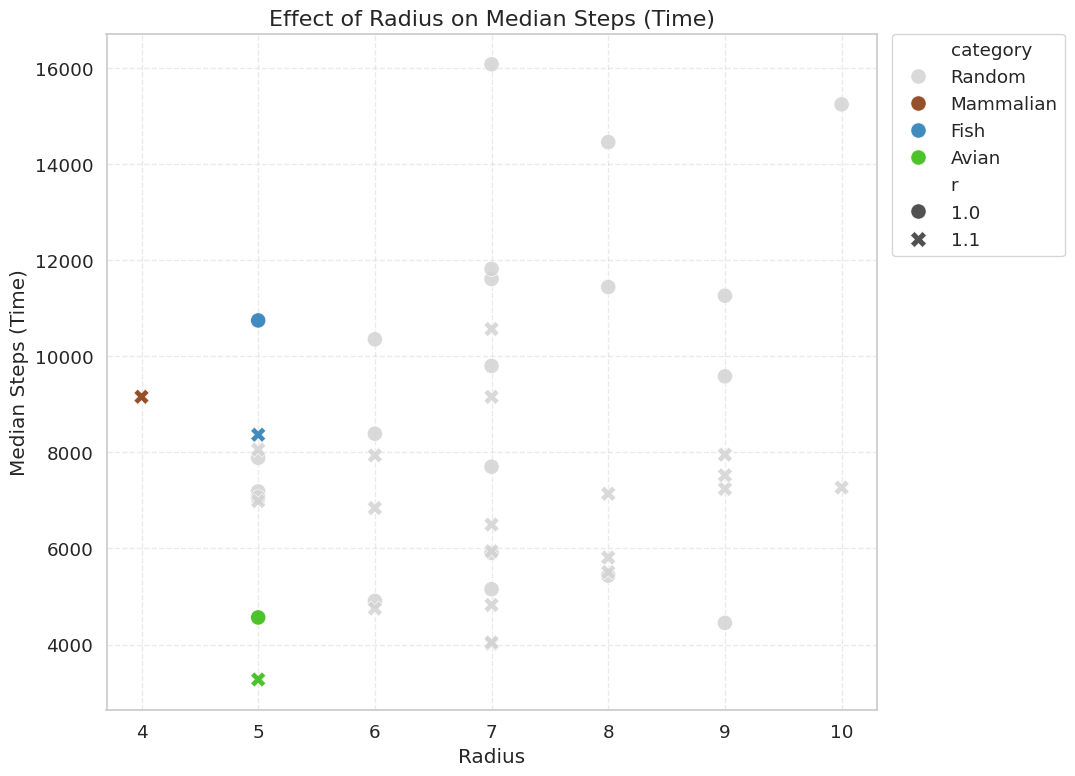

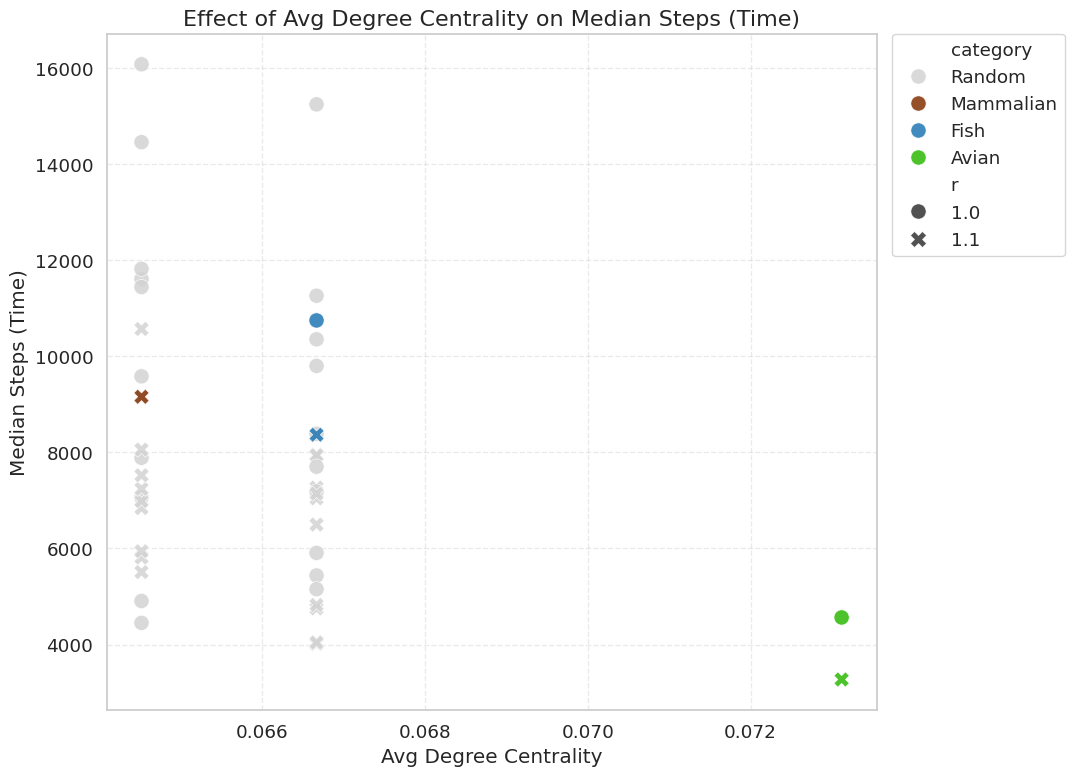

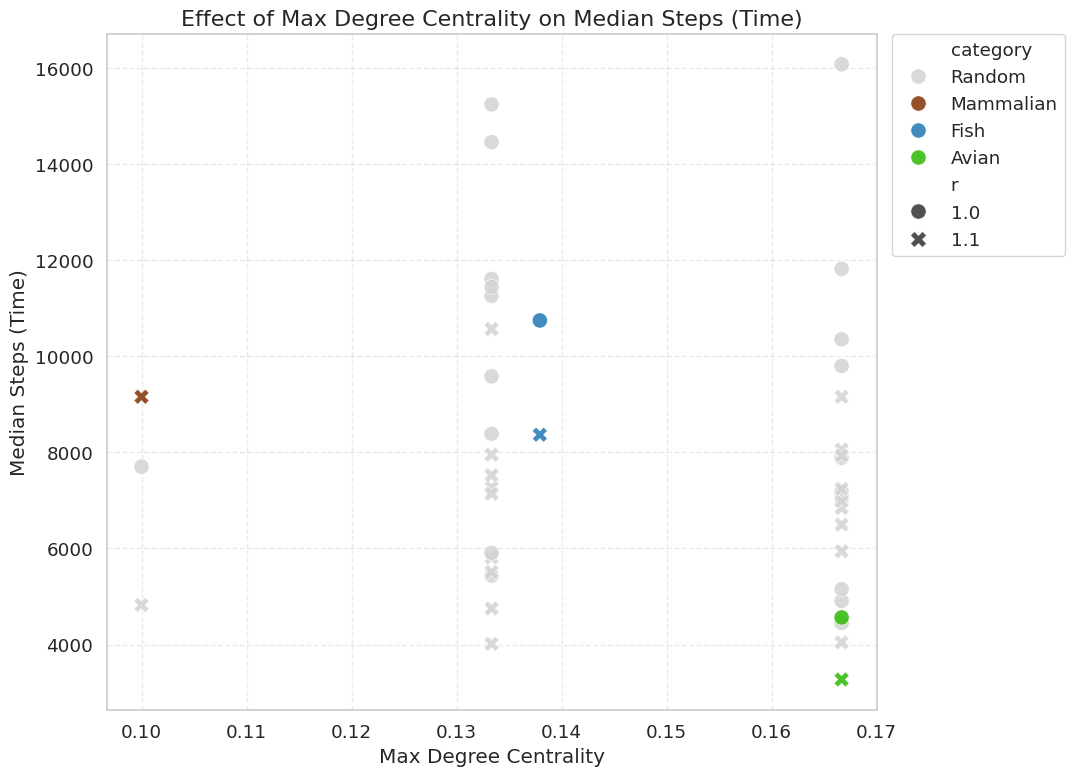

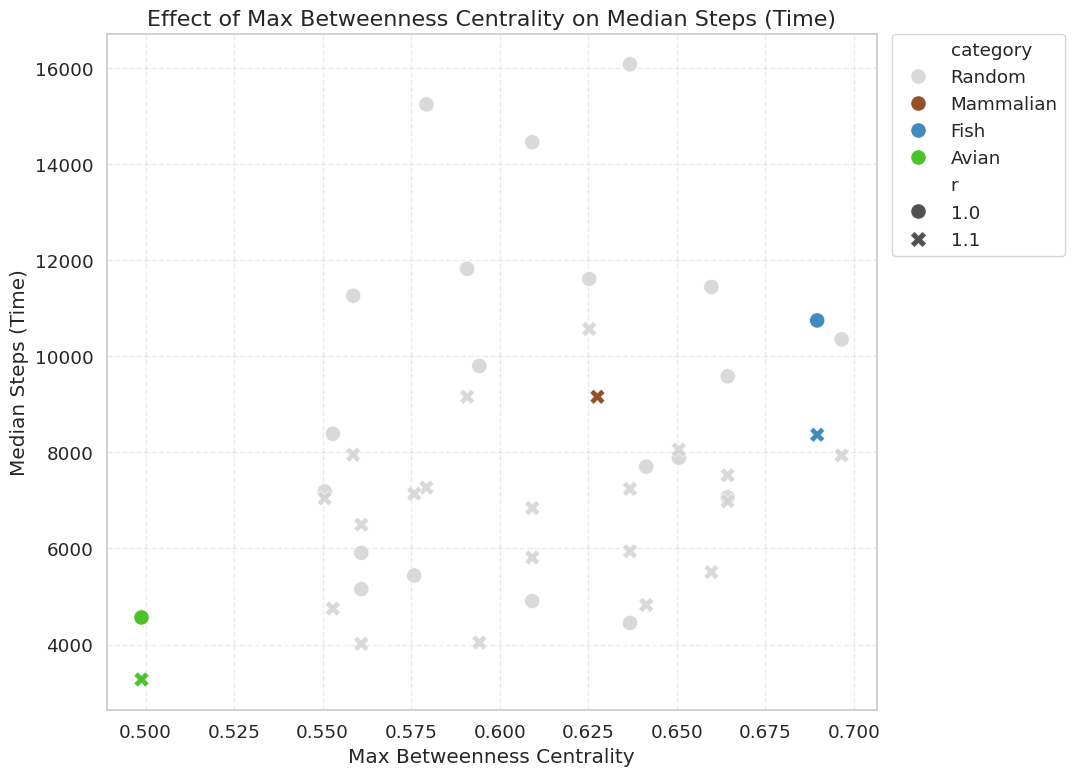

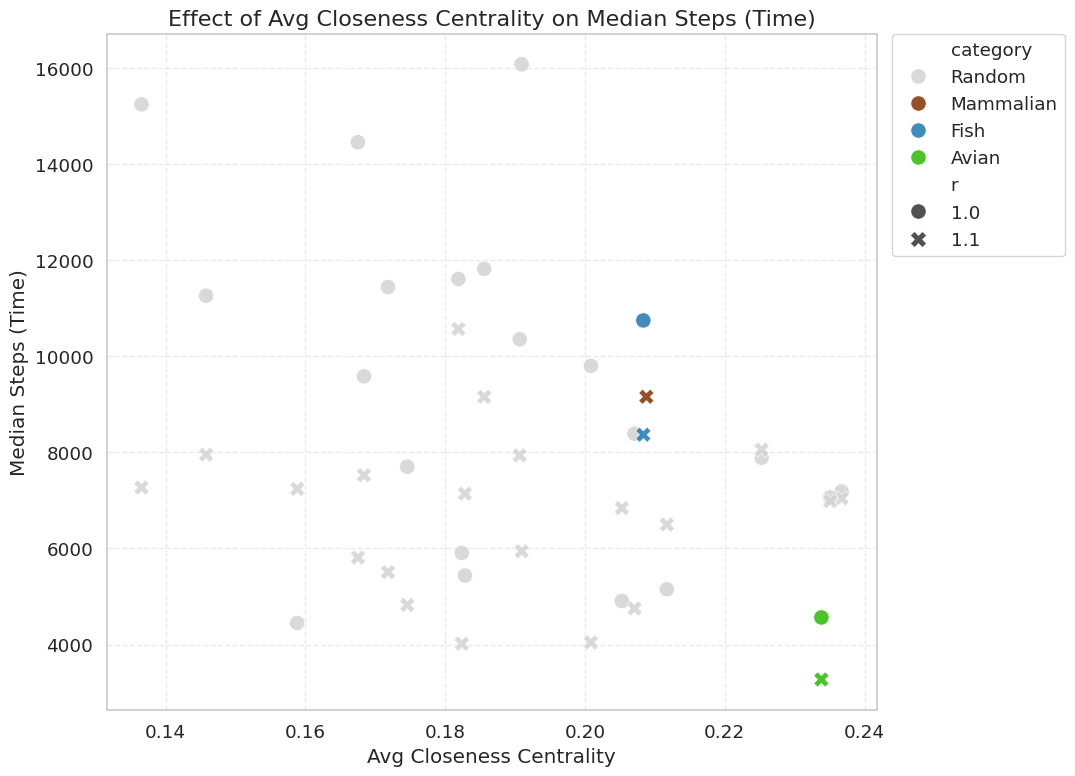

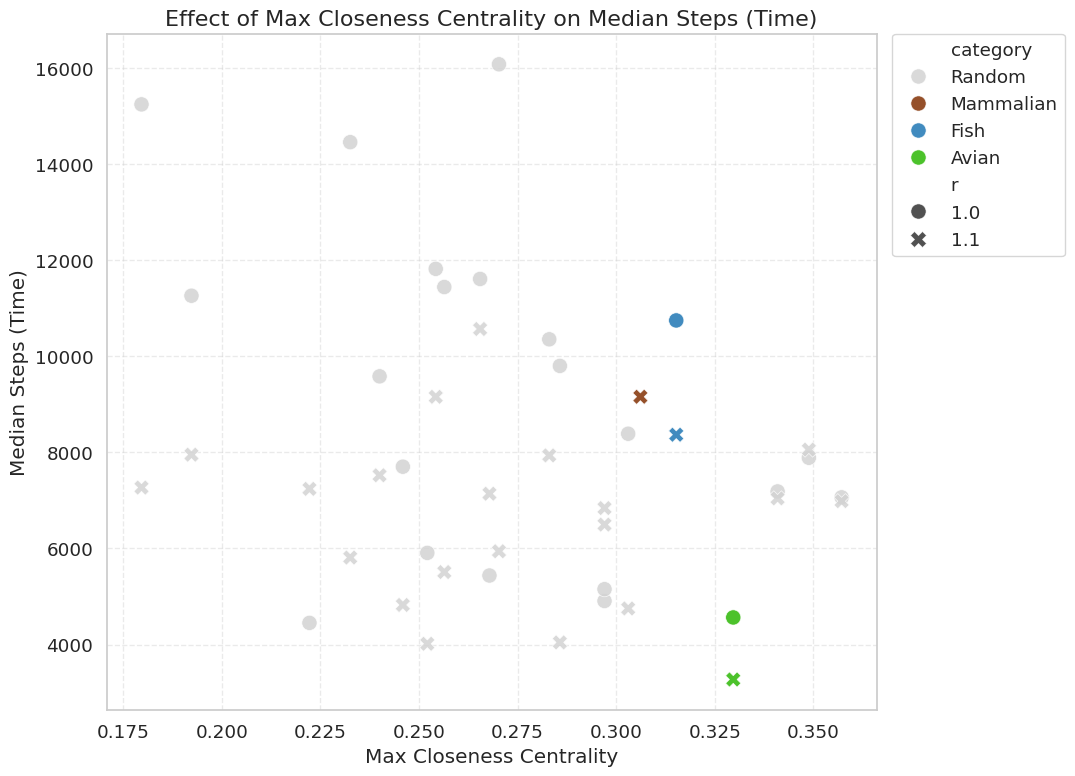

In [26]:

print(len(GRAPH_PROPS))
plot_property_effect(analysis_df, 'median_steps', 'prob_fixation')
# --- EXAMPLES OF USAGE ---
for prop in GRAPH_PROPS:
    plot_property_effect(analysis_df, prop, 'median_steps')